In [1]:
from qutip import *
import numpy as np
import scipy as sp
import math
import matplotlib.pyplot as plt

In [2]:
def psi(g,e):
    return np.array([g, e])

#def pulse(t, Omega0, delPrime):
#    Omega = np.sqrt(Omega0**2 + delPrime**2)
#    
#    return np.array([[np.cos(Omega*t/2.0) -(1.0j*delPrime/Omega)*np.sin(Omega*t/2.0), (1.0j*Omega0/Omega)*np.sin(Omega*t/2.0)],
#             [(1.0j*Omega0/Omega)*np.sin(Omega*t/2.0) , np.cos(Omega*t/2.0) + (1.0j*delPrime/Omega)*np.sin(Omega*t/2.0)]])

def pulse(t, Omega0, delta, phi0, phi1):
    Omega = np.sqrt(Omega0**2 + delta**2)
    
    if Omega == 0.0:
        U = np.array([[1.0 , 0.0],
                      [0.0 , 1.0]])
        
    else:
        U = np.array([[np.cos(Omega*t/2.0) -(1.0j*delta/Omega)*np.sin(Omega*t/2.0), (1.0j*Omega0/Omega)*np.sin(Omega*t/2.0)],
                     [(1.0j*Omega0/Omega)*np.sin(Omega*t/2.0) , np.cos(Omega*t/2.0) + (1.0j*delta/Omega)*np.sin(Omega*t/2.0)]])
    
    V1 = np.array([[1.0 , 0.0],
                   [0.0 , np.exp(-1.0j*phi1)]])
    
    V0 = np.array([[1.0 , 0.0],
                   [0.0 , np.exp(1.0j*phi0)]])
    
    return np.exp(1.0j*delta*t/2.0)*V1@U@V0

def rhoee(psi):
    return (abs(psi[1]))**2.0

def rhogg(psi):
    return (abs(psi[0]))**2.0

def phi(psi):
    phi0 = math.atan2(np.real(psi[0]),np.imag(psi[0]))
    phi1 = math.atan2(np.real(psi[1]),np.imag(psi[1]))
    return (phi0-phi1)

def blochVec(psi):
    w = rhogg(psi) - rhoee(psi)  #pointed up is ground state
    if abs(w)>1.0:
        w = float(round(w))
    x = np.sin(np.arccos(w))*np.cos(phi(psi))
    y = np.sin(np.arccos(w))*np.sin(phi(psi))
    return np.array([x,y,w])

In [3]:
def ramseyInjP(psi0, t, delta, delPrime, Omega01, Omega02):
    pi2Pulse1 = pulse(np.pi/(2.0*Omega01), Omega01, delPrime, 0.0, 0.0)
    pi2Pulse2 = pulse(np.pi/(2.0*Omega01), Omega02, delPrime, 0.0, 0.0)
    freeEvo = pulse(t, 0.0, delta, 0.0, 0.0)
    pi2PhaseInj = pulse(0.0, 0.0, 0.0, 0.0, np.pi/2.0) 
    
    return pi2Pulse2@pi2PhaseInj@freeEvo@pi2Pulse1@psi0

def ramseyInjM(psi0, t, delta, delPrime, Omega01, Omega02):
    pi2Pulse1 = pulse(np.pi/(2.0*Omega01), Omega01, delPrime, 0.0, 0.0)
    pi2Pulse2 = pulse(np.pi/(2.0*Omega01), Omega02, delPrime, 0.0, 0.0)
    freeEvo = pulse(t, 0.0, delta, 0.0, 0.0)
    pi2PhaseInj = pulse(0.0, 0.0, 0.0, 0.0, -np.pi/2.0) 
    
    return pi2Pulse2@pi2PhaseInj@freeEvo@pi2Pulse1@psi0

def errSig(psi0, t, delta, delPrime, Omega01, Omega02):
    RhoeeP = rhoee(ramseyInjP(psi0,t,delta,delPrime,Omega01, Omega02))
    RhoeeM = rhoee(ramseyInjM(psi0,t,delta,delPrime,Omega01, Omega02))
    return RhoeeP - RhoeeM

In [4]:
def hyperRamseyP(psi0, t1, T, t2, delta, delPrime, Omega01, Omega02):
    #pulse(t, Omega0, delta, phi0, phi1):
    pulse1 = pulse(t1, Omega01, delPrime, 0.0, 0.0)
    pulse2 = pulse(t2, Omega02, delPrime, 0.0, 0.0)
    freeEvo = pulse(T, 0.0, delta, 0.0, 0.0)
    pi2PhaseInj = pulse(0.0, 0.0, 0.0, 0.0, np.pi/2.0) 
    
    return pulse2@freeEvo@pi2PhaseInj@pulse1@psi0

def hyperRamseyM(psi0, t1, T, t2, delta, delPrime, Omega01, Omega02):
    #pulse(t, Omega0, delta, phi0, phi1):
    pulse1 = pulse(t1, Omega01, delPrime, 0.0, 0.0)
    pulse2 = pulse(t2, Omega02, delPrime, 0.0, 0.0)
    freeEvo = pulse(T, 0.0, delta, 0.0, 0.0)
    pi2PhaseInj = pulse(0.0, 0.0, 0.0, 0.0, -np.pi/2.0) 
    
    return pulse2@freeEvo@pi2PhaseInj@pulse1@psi0

def HRerrSig(psi0, t1, T, t2, delta, delPrime, Omega01, Omega02):
    RhoeeP = rhoee(hyperRamseyP(psi0,t1,T,t2,delta,delPrime,Omega01,Omega02))
    RhoeeM = rhoee(hyperRamseyM(psi0,t1,T,t2,delta,delPrime,Omega01,Omega02))
    return RhoeeP - RhoeeM

In [5]:
def hyperRamseyPhaseJumpM(psi0, t1, T, t2, delta, delPrime, Omega01, Omega02, Omega03):
    #pulse(t, Omega0, delta, phi0, phi1):
    pulse1 = pulse(t1, Omega01, delPrime, 0.0, 0.0)
    pulse2 = pulse(2.0*t2/3.0, -Omega02, delPrime, 0.0, 0.0)
    pulse3 = pulse(t2/3.0, Omega03, delPrime, 0.0, 0.0)
    pi2PhaseInj = pulse(0.0, 0.0, 0.0, 0.0, -np.pi/2.0)
    freeEvo = pulse(T, 0.0, delta, 0.0, 0.0)
    
    return pulse3@pulse2@freeEvo@pi2PhaseInj@pulse1@psi0

def hyperRamseyPhaseJumpP(psi0, t1, T, t2, delta, delPrime, Omega01, Omega02, Omega03):
    #pulse(t, Omega0, delta, phi0, phi1):
    pulse1 = pulse(t1, Omega01, delPrime, 0.0, 0.0)
    pulse2 = pulse(2.0*t2/3.0, -Omega02, delPrime, 0.0, 0.0)
    pulse3 = pulse(t2/3.0, Omega03, delPrime, 0.0, 0.0)
    pi2PhaseInj = pulse(0.0, 0.0, 0.0, 0.0, np.pi/2.0)
    freeEvo = pulse(T, 0.0, delta, 0.0, 0.0)
    
    return pulse3@pulse2@freeEvo@pi2PhaseInj@pulse1@psi0

def HRJumperrSig(psi0, t1, T, t2, delta, delPrime, Omega01, Omega02, Omega03):
    RhoeeP = rhoee(hyperRamseyPhaseJumpP(psi0,t1,T,t2,delta,delPrime,Omega01,Omega02,Omega03))
    RhoeeM = rhoee(hyperRamseyPhaseJumpM(psi0,t1,T,t2,delta,delPrime,Omega01,Omega02,Omega03))
    return RhoeeP - RhoeeM

In [6]:
def hyperRamseyPhaseJump2M(psi0, t1, T, t2, delta, delPrime, Omega01, Omega02, Omega03):
    pulse1 = pulse(t1/3.0, Omega01, delPrime, 0.0, 0.0)
    pulse2 = pulse(2.0*t1/3.0, -Omega02, delPrime, 0.0, 0.0)
    pulse3 = pulse(t2, Omega03, delPrime, 0.0, 0.0)
    pi2PhaseInj = pulse(0.0, 0.0, 0.0, 0.0, -np.pi/2.0)
    freeEvo = pulse(T, 0.0, delta, 0.0, 0.0)
    
    return pulse3@freeEvo@pi2PhaseInj@pulse2@pulse1@psi0

def hyperRamseyPhaseJump2P(psi0, t1, T, t2, delta, delPrime, Omega01, Omega02, Omega03):
    pulse1 = pulse(t1/3.0, Omega01, delPrime, 0.0, 0.0)
    pulse2 = pulse(2.0*t1/3.0, -Omega02, delPrime, 0.0, 0.0)
    pulse3 = pulse(t2, Omega03, delPrime, 0.0, 0.0)
    pi2PhaseInj = pulse(0.0, 0.0, 0.0, 0.0, np.pi/2.0)
    freeEvo = pulse(T, 0.0, delta, 0.0, 0.0)
    
    return pulse3@freeEvo@pi2PhaseInj@pulse2@pulse1@psi0

def HRJump2errSig(psi0, t1, T, t2, delta, delPrime, Omega01, Omega02, Omega03):
    RhoeeP = rhoee(hyperRamseyPhaseJump2P(psi0,t1,T,t2,delta,delPrime,Omega01,Omega02,Omega03))
    RhoeeM = rhoee(hyperRamseyPhaseJump2M(psi0,t1,T,t2,delta,delPrime,Omega01,Omega02,Omega03))
    return RhoeeP - RhoeeM

In [7]:
def HRvalidate_interval(psi0, t1, T, t2, Delta, Omega01, Omega02, x0, x1):
    return HRerrSig(psi0, t1, T, t2, x0, x0+Delta, Omega01, Omega02) * HRerrSig(psi0, t1, T, t2, x1, x1+Delta, Omega01, Omega02) < 0

def HRJumpvalidate_interval(psi0, t1, T, t2, Delta, Omega01, Omega02, Omega03, x0, x1):
    return HRJumperrSig(psi0,t1,T,t2,x0,x0+Delta,Omega01,Omega02,Omega03)*HRJumperrSig(psi0,t1,T,t2,x1,x1+Delta,Omega01,Omega02,Omega03) < 0

def HRJump2validate_interval(psi0, t1, T, t2, Delta, Omega01, Omega02, Omega03, x0, x1):
    return HRJump2errSig(psi0,t1,T,t2,x0,x0+Delta,Omega01,Omega02,Omega03)*HRJump2errSig(psi0,t1,T,t2,x1,x1+Delta,Omega01,Omega02,Omega03) < 0

def validate_interval(psi0, t, Delta, Omega01, Omega02, x0, x1):
    return errSig(psi0, t, x0, x0+Delta, Omega01, Omega02) * errSig(psi0, t, x1, x1+Delta, Omega01, Omega02) < 0

def error_bound(a, b, err):
    n = np.log((b - a) / err) / np.log(2)
    return int(np.ceil(n))

def HRfindRoot(psi0, t1, T, t2, Delta, Omega01, Omega02, tol, guess):
    x0 = guess - np.abs(guess)*0.025 - 0.015/Omega02
    x1 = guess + np.abs(guess)*0.025 + 0.015/Omega02
    #x0 = guess - 0.01
    #x1 = guess + 0.01
    #print(x0,x1)
    
    if not HRvalidate_interval(psi0, t1, T, t2, Delta, Omega01, Omega02, x0, x1):
        print("not valid interval")
        return
    
    n = error_bound(x0, x1, tol)
    counter = 1
    
    while True:
        root_approx = x0 + ((x1 - x0) / 2.0) 
        y = HRerrSig(psi0, t1, T, t2, root_approx, root_approx+Delta, Omega01, Omega02)
        if -tol < y < tol:
            #print(Delta)
            return root_approx
        if HRvalidate_interval(psi0, t1, T, t2, Delta, Omega01, Omega02, x0, root_approx):
            x1 = root_approx
        else:
            x0 = root_approx
        counter +=1
        
def HRJumpfindRoot(psi0, t1, T, t2, Delta, Omega01, Omega02, Omega03, tol):
    x0 = -0.1*Delta/(Omega01*T) - 0.25*np.abs(2.0*Delta/(Omega01*T)) - 0.01
    x1 = -0.1*Delta/(Omega01*T) + 0.25*np.abs(2.0*Delta/(Omega01*T)) + 0.01
    #print(x0,x1)
    
    if not HRJumpvalidate_interval(psi0, t1, T, t2, Delta, Omega01, Omega02, Omega03, x0, x1):
        print("not valid interval")
        return
    
    n = error_bound(x0, x1, tol)
    counter = 1
    
    while True:
        root_approx = x0 + ((x1 - x0) / 2.0) 
        y = HRJumperrSig(psi0, t1, T, t2, root_approx, root_approx+Delta, Omega01, Omega02, Omega03)
        if -tol < y < tol:
            return root_approx
        if HRJumpvalidate_interval(psi0, t1, T, t2, Delta, Omega01, Omega02, Omega03, x0, root_approx):
            x1 = root_approx
        else:
            x0 = root_approx
        counter +=1
        
def HRJump2findRoot(psi0, t1, T, t2, Delta, Omega01, Omega02, Omega03, tol):
    x0 = -0.1*Delta/(Omega03*T) - 1.25*np.abs(2.0*Delta/(Omega03*T)) - 0.01
    x1 = -0.1*Delta/(Omega03*T) + 1.25*np.abs(2.0*Delta/(Omega03*T)) + 0.01
    #print(x0,x1)
    
    if not HRJump2validate_interval(psi0, t1, T, t2, Delta, Omega01, Omega02, Omega03, x0, x1):
        print("not valid interval")
        return
    
    n = error_bound(x0, x1, tol)
    counter = 1
    
    while True:
        root_approx = x0 + ((x1 - x0) / 2.0) 
        y = HRJump2errSig(psi0, t1, T, t2, root_approx, root_approx+Delta, Omega01, Omega02, Omega03)
        if -tol < y < tol:
            return root_approx
        if HRJump2validate_interval(psi0, t1, T, t2, Delta, Omega01, Omega02, Omega03, x0, root_approx):
            x1 = root_approx
        else:
            x0 = root_approx
        counter +=1

def findRoot(psi0, t, Delta, Omega01, Omega02, tol): 
    x0 = -2.0*Delta/(Omega01*t) - 0.5*np.abs(2.0*Delta/(Omega01*t)) - 0.01
    x1 = -2.0*Delta/(Omega01*t) + 0.5*np.abs(2.0*Delta/(Omega01*t)) + 0.01
    
    if not validate_interval(psi0, t, Delta, Omega01, Omega02, x0, x1):
        print("not valid interval")
        return
    
    n = error_bound(x0, x1, tol)
    counter = 1
    
    while True:
        root_approx = x0 + ((x1 - x0) / 2.0) 
        y = errSig(psi0, t, root_approx, root_approx+Delta, Omega01, Omega02)
        if -tol < y < tol:
            return root_approx
        if validate_interval(psi0, t, Delta, Omega01, Omega02, x0, root_approx):
            x1 = root_approx
        else:
            x0 = root_approx
        counter +=1
        
def HRLongfindRoot(psi0, t1, T, t2, Delta, Omega01, Omega02, tol, guess):
    x0 = guess - 0.0009
    x1 = guess + 0.0009
    #print(x0,x1)
    
    if not HRvalidate_interval(psi0, t1, T, t2, Delta, Omega01, Omega02, x0, x1):
        print("not valid interval")
        return
    
    n = error_bound(x0, x1, tol)
    counter = 1
    
    while True:
        root_approx = x0 + ((x1 - x0) / 2.0) 
        y = HRerrSig(psi0, t1, T, t2, root_approx, root_approx+Delta, Omega01, Omega02)
        if -tol < y < tol:
            #print(Delta)
            return root_approx
        if HRvalidate_interval(psi0, t1, T, t2, Delta, Omega01, Omega02, x0, root_approx):
            x1 = root_approx
        else:
            x0 = root_approx
        counter +=1
        
def HR7findRoot(psi0, t1, T, t2, Delta, Omega01, Omega02, tol, guess):
    x0 = guess - 0.01
    x1 = guess + 0.01
    print(x0,x1)
    
    if not HRvalidate_interval(psi0, t1, T, t2, Delta, Omega01, Omega02, x0, x1):
        print("not valid interval")
        return
    
    n = error_bound(x0, x1, tol)
    counter = 1
    
    while True:
        root_approx = x0 + ((x1 - x0) / 2.0) 
        y = HRerrSig(psi0, t1, T, t2, root_approx, root_approx+Delta, Omega01, Omega02)
        if -tol < y < tol:
            #print(Delta)
            return root_approx
        if HRvalidate_interval(psi0, t1, T, t2, Delta, Omega01, Omega02, x0, root_approx):
            x1 = root_approx
        else:
            x0 = root_approx
        counter +=1

In [8]:
def HRJumpHeatingSensitivity(q, pts):
    psi0 = psi(0.0, 1.0)
    Omega01 = 1.0
    Omega02 = q*Omega01
    Omega03 = q*Omega01
    t1 = np.pi/2.0
    T = 20.0/Omega01
    t2 = 3.0*np.pi/2.0
    tol = 1.0e-10

    #pts = 101 
    Deltas = np.linspace(-0.1, 0.1, pts)
    clockShifts0 = np.zeros(pts,)
    for ii in range(pts):
        clockShifts0[ii] = T*HRJumpfindRoot(psi0, t1, T, t2, Deltas[ii], Omega01, Omega02, Omega03, tol)

    return (clockShifts0[pts//2 + 1] - clockShifts0[pts//2 - 1])/(Deltas[pts//2 + 1] - Deltas[pts//2 - 1])# - noHeatSens

def HRJump2HeatingSensitivity(q):
    psi0 = psi(0.0, 1.0)
    Omega01 = 1.0
    Omega02 = Omega01
    Omega03 = q*Omega01
    t1 = 3.0*np.pi/2.0
    T = 20.0/Omega01
    t2 = np.pi/2.0
    tol = 1.0e-10

    pts = 51 
    Deltas = np.linspace(-0.1, 0.1, pts)
    clockShifts0 = np.zeros(pts,)
    for ii in range(pts):
        clockShifts0[ii] = T*HRJump2findRoot(psi0, t1, T, t2, Deltas[ii], Omega01, Omega02, Omega03, tol)

    return (clockShifts0[pts//2 + 1] - clockShifts0[pts//2 - 1])/(Deltas[pts//2 + 1] - Deltas[pts//2 - 1])# - noHeatSens

def HRHeatingSensitivity(q):
    psi0 = psi(0.0, 1.0)
    Omega01 = 1.0
    Omega02 = Omega01*q
    t1 = np.pi/(2.0*Omega01)
    T = 20.0/Omega01
    t2 = 3.0*np.pi/(2.0*Omega01)
    tol = 1.0e-10
    CS0 = 0.0

    pts = 2
    Deltas = np.linspace(0.0, 0.0005, pts)
    clockShifts0 = np.zeros(pts,)
    for ii in range(pts):
        #print(Deltas[ii])
        shift = HRfindRoot(psi0, t1, T, t2, Deltas[ii], Omega01, Omega02, tol, CS0)
        if not isinstance(shift, float):
            return
        else:
            clockShifts0[ii] = T*shift
            CS0 = clockShifts0[ii]/T
            
    return (clockShifts0[1] - clockShifts0[0])/(Deltas[1] - Deltas[0])        
    

def HRLongHeatingSensitivity(q):
    psi0 = psi(0.0, 1.0)
    Omega01 = 1.0
    Omega02 = Omega01*q
    t1 = np.pi/(2.0*Omega01)
    T = 20.0/Omega01
    t2 = 5.0*np.pi/(2.0*Omega01)
    tol = 1.0e-10
    CS0 = 0.0

    pts = 2
    Deltas = np.linspace(0.0, 0.001, pts)
    clockShifts0 = np.zeros(pts,)
    for ii in range(pts):
        #print(Deltas[ii])
        clockShifts0[ii] = T*HRLongfindRoot(psi0, t1, T, t2, Deltas[ii], Omega01, Omega02, tol, CS0)
        CS0 = clockShifts0[ii]/T

    return (clockShifts0[1] - clockShifts0[0])/(Deltas[1] - Deltas[0])

def HR7HeatingSensitivity(q):
    psi0 = psi(0.0, 1.0)
    Omega01 = 1.0
    Omega02 = Omega01*q
    t1 = np.pi/(2.0*Omega01)
    T = 20.0/Omega01
    t2 = 7.0*np.pi/(2.0*Omega01)
    tol = 1.0e-10
    CS0 = 0.0

    pts = 2
    Deltas = np.linspace(0.0, 0.0001, pts)
    clockShifts0 = np.zeros(pts,)
    for ii in range(pts):
        #print(Deltas[ii])
        clockShifts0[ii] = T*HRLongfindRoot(psi0, t1, T, t2, Deltas[ii], Omega01, Omega02, tol, CS0)
        CS0 = clockShifts0[ii]/T

    return (clockShifts0[1] - clockShifts0[0])/(Deltas[1] - Deltas[0])

def RamseyHeatingSensitivity(q):
    psi0 = psi(0.0, 1.0)
    Omega01 = 1.0
    Omega02 = q*Omega01
    T = 20.0/Omega01
    tol = 1.0e-10

    pts = 51 
    Deltas = np.linspace(-0.1, 0.1, pts)
    clockShifts0 = np.zeros(pts,)
    for ii in range(pts):
        clockShifts0[ii] = T*findRoot(psi0, T, Deltas[ii], Omega01, Omega02, tol)

    return (clockShifts0[pts//2 + 1] - clockShifts0[pts//2 - 1])/(Deltas[pts//2 + 1] - Deltas[pts//2 - 1])# - noHeatSens

def RamseyHeatingSensitivity2(q):
    psi0 = psi(0.0, 1.0)
    Omega01 = 1.0
    Omega02 = q*Omega01
    T = 20.0/Omega01
    tol = 1.0e-10

    pts = 2 
    Deltas = np.linspace(0.0, 0.001, pts)
    clockShifts0 = np.zeros(pts,)
    for ii in range(pts):
        clockShifts0[ii] = T*findRoot(psi0, T, Deltas[ii], Omega01, Omega02, tol)

    return (clockShifts0[1] - clockShifts0[0])/(Deltas[1] - Deltas[0])# - noHeatSens

As in the notes from Friday 10/28, I'll call the detuning during the pulse $\delta'$ (delp), the detuning during the dark time $\delta_d$ (deld), and the difference between them $\Delta = \delta_d - \delta'$ (Delta) as in the HRS paper.

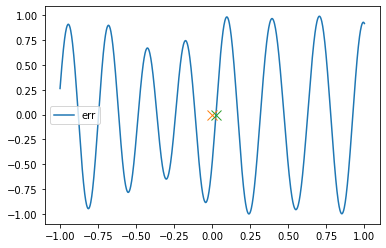

In [9]:
psi0 = psi(0.0, 1.0)
q = 0.8
Delta = -0.5
Omega01 = 1.0
Omega02 = q*Omega01
Omega03 = q*Omega01
t1 = np.pi/(2.0*Omega01)
T = 20.0/Omega01
t2 = 3.0*np.pi/(2.0*Omega01)
tol = 1.0e-10

pts = 1000
delds = np.linspace(-1.0, 1.0, pts)
errSigPts = np.zeros(pts,)
RhoeeM = np.zeros(pts,)
RhoeeP = np.zeros(pts,)
dif = np.zeros(pts,)
for ii in range(pts):
    errSigPts[ii] = HRJumperrSig(psi0, t1, T, t2, delds[ii], delds[ii]+Delta, Omega01, Omega02, Omega03)
    RhoeeM[ii] = rhoee(hyperRamseyPhaseJumpM(psi0, t1, T, t2, delds[ii], delds[ii]+Delta, Omega01, Omega02, Omega03))
    RhoeeP[ii] = rhoee(hyperRamseyPhaseJumpP(psi0, t1, T, t2, delds[ii], delds[ii]+Delta, Omega01, Omega02, Omega03))
    dif[ii] = RhoeeP[ii] - RhoeeM[ii]
    
plt.plot(delds,errSigPts, label = "err")
#plt.plot(delds, dif, label="dif")
#plt.plot(delds,RhoeeM, label="p")
#plt.plot(delds, RhoeeP, label="m")
plt.plot([0.0], [0.0], marker="x", markerfacecolor="red", markersize=10)
plt.plot([HRJumpfindRoot(psi0, t1, T, t2, Delta, Omega01, Omega02, Omega03, tol)],[0.0], marker="x", markerfacecolor="red", markersize=10)
plt.legend()
plt.show()

Effect of heating on Hyper-Ramsey sequence with phase jump 2/3 the way through the second pulse:

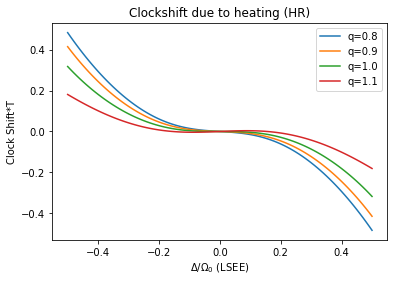

In [10]:
psi0 = psi(0.0, 1.0)
q = 0.9
Omega01 = 1.0
Omega02 = q*Omega01
Omega03 = q*Omega01
t1 = np.pi/2.0
T = 20.0/Omega01
t2 = 3.0*np.pi/2.0
tol = 1.0e-10

pts = 101 
Deltas = np.linspace(-0.5, 0.5, pts)
clockShifts0 = np.zeros(pts,)
clockShifts1 = np.zeros(pts,)
clockShifts2 = np.zeros(pts,)
clockShifts3 = np.zeros(pts,)
for ii in range(pts):
    clockShifts0[ii] = T*HRJumpfindRoot(psi0, t1, T, t2, Deltas[ii], Omega01, 0.8*Omega01, 0.8*Omega01, tol)
    clockShifts1[ii] = T*HRJumpfindRoot(psi0, t1, T, t2, Deltas[ii], Omega01, 0.9*Omega01, 0.9*Omega01, tol)
    clockShifts2[ii] = T*HRJumpfindRoot(psi0, t1, T, t2, Deltas[ii], Omega01, 1.0*Omega01, 1.0*Omega01, tol)
    clockShifts3[ii] = T*HRJumpfindRoot(psi0, t1, T, t2, Deltas[ii], Omega01, 1.1*Omega01, 1.1*Omega01, tol)
    
plt.plot(Deltas, clockShifts0, label="q=0.8")
plt.plot(Deltas, clockShifts1, label="q=0.9")
plt.plot(Deltas, clockShifts2, label="q=1.0")
plt.plot(Deltas, clockShifts3, label="q=1.1")
plt.xlabel("$\Delta / \Omega_0$ (LSEE)")
plt.ylabel('Clock Shift*T')
plt.title("Clockshift due to heating (HR)")
plt.legend()
plt.show()

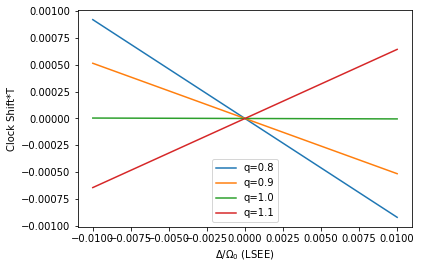

In [11]:
plt.plot(Deltas[pts//2 - 1: pts//2 + 2], clockShifts0[pts//2 - 1: pts//2 + 2], label="q=0.8")
plt.plot(Deltas[pts//2 - 1: pts//2 + 2], clockShifts1[pts//2 - 1: pts//2 + 2], label="q=0.9")
plt.plot(Deltas[pts//2 - 1: pts//2 + 2], clockShifts2[pts//2 - 1: pts//2 + 2], label="q=1.0")
plt.plot(Deltas[pts//2 - 1: pts//2 + 2], clockShifts3[pts//2 - 1: pts//2 + 2], label="q=1.1")
plt.legend()
plt.xlabel("$\Delta / \Omega_0$ (LSEE)")
plt.ylabel('Clock Shift*T')
plt.show()

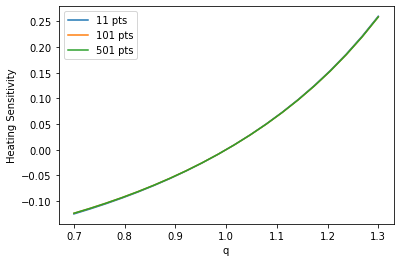

In [12]:
pts = 20
qPts = np.linspace(0.7, 1.3, pts)
heatSens0 = np.zeros(pts,)
heatSens1 = np.zeros(pts,)
heatSens2 = np.zeros(pts,)
pts0 = 11
pts1 = 101
pts2 = 501

for ii in range(pts):
    heatSens0[ii] = HRJumpHeatingSensitivity(qPts[ii], pts0)
    heatSens1[ii] = HRJumpHeatingSensitivity(qPts[ii], pts1)
    heatSens2[ii] = HRJumpHeatingSensitivity(qPts[ii], pts2)

heatSens0 = heatSens0 - HRJumpHeatingSensitivity(1.0, pts0)
heatSens1 = heatSens1 - HRJumpHeatingSensitivity(1.0, pts1)
heatSens2 = heatSens2 - HRJumpHeatingSensitivity(1.0, pts2)
plt.plot(qPts, heatSens0, label="11 pts")
plt.plot(qPts, heatSens1, label="101 pts")
plt.plot(qPts, heatSens2, label="501 pts")
plt.xlabel("q")
plt.ylabel("Heating Sensitivity")
plt.legend()
plt.show()

Effect of heating on regular Ramsey sequence:

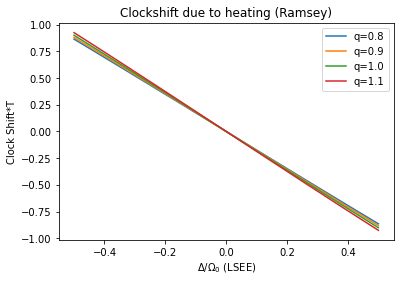

In [13]:
psi0 = psi(0.0, 1.0)
q = 0.9
Omega01 = 1.0
Omega02 = q*Omega01
T = 20.0/Omega01
tol = 1.0e-10

pts = 101 
Deltas = np.linspace(-0.5, 0.5, pts)
clockShifts0 = np.zeros(pts,)
clockShifts1 = np.zeros(pts,)
clockShifts2 = np.zeros(pts,)
clockShifts3 = np.zeros(pts,)
for ii in range(pts):
    clockShifts0[ii] = T*findRoot(psi0,T, Deltas[ii], Omega01, 0.8*Omega01, tol)
    clockShifts1[ii] = T*findRoot(psi0,T, Deltas[ii], Omega01, 0.9*Omega01, tol)
    clockShifts2[ii] = T*findRoot(psi0,T, Deltas[ii], Omega01, 1.0*Omega01, tol)
    clockShifts3[ii] = T*findRoot(psi0,T, Deltas[ii], Omega01, 1.1*Omega01, tol)
    
plt.plot(Deltas, clockShifts0, label="q=0.8")
plt.plot(Deltas, clockShifts1, label="q=0.9")
plt.plot(Deltas, clockShifts2, label="q=1.0")
plt.plot(Deltas, clockShifts3, label="q=1.1")
plt.xlabel("$\Delta / \Omega_0$ (LSEE)")
plt.ylabel('Clock Shift*T')
plt.title("Clockshift due to heating (Ramsey)")
plt.legend()
plt.show()

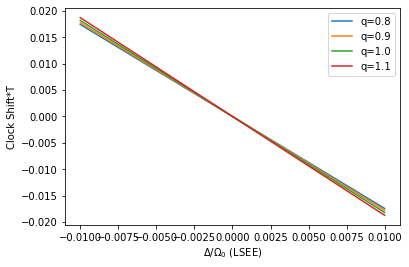

In [14]:
plt.plot(Deltas[pts//2 - 1: pts//2 + 2], clockShifts0[pts//2 - 1: pts//2 + 2], label="q=0.8")
plt.plot(Deltas[pts//2 - 1: pts//2 + 2], clockShifts1[pts//2 - 1: pts//2 + 2], label="q=0.9")
plt.plot(Deltas[pts//2 - 1: pts//2 + 2], clockShifts2[pts//2 - 1: pts//2 + 2], label="q=1.0")
plt.plot(Deltas[pts//2 - 1: pts//2 + 2], clockShifts3[pts//2 - 1: pts//2 + 2], label="q=1.1")
plt.legend()
plt.xlabel("$\Delta / \Omega_0$ (LSEE)")
plt.ylabel('Clock Shift*T')
plt.show()

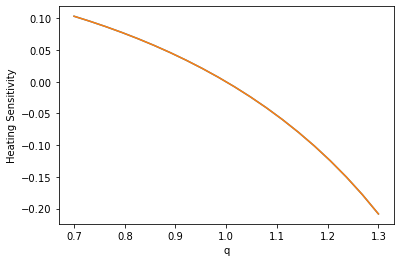

In [15]:
pts = 20
qPts = np.linspace(0.7, 1.3, pts)
heatSens = np.zeros(pts,)
heatSens2 = np.zeros(pts,)
for ii in range(pts):
    heatSens[ii] = RamseyHeatingSensitivity(qPts[ii])
    heatSens2[ii] = RamseyHeatingSensitivity2(qPts[ii])


heatSens = heatSens - RamseyHeatingSensitivity(1.0)
heatSens2 = heatSens2 - RamseyHeatingSensitivity2(1.0)
plt.plot(qPts, heatSens)
plt.plot(qPts, heatSens2)
plt.xlabel("q")
plt.ylabel("Heating Sensitivity")
plt.show()

Now this same process for a Hyper-Ramsey sequence with the $3\pi/2$ pulse sequence before the dark time. First, check to make sure the rootfinder is working.

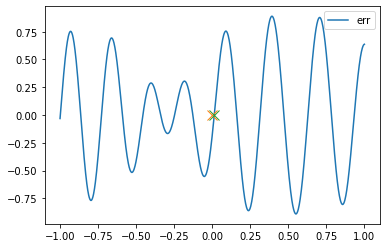

0.013303048108105679

In [16]:
psi0 = psi(0.0, 1.0)
q = 0.7
Delta = -0.5
Omega01 = 1.0
Omega02 = Omega01
Omega03 = q*Omega01
t1 = 3.0*np.pi/(2.0*Omega01)
T = 20.0/Omega01
t2 = np.pi/(2.0*Omega01)
tol = 1.0e-10

pts = 1000
delds = np.linspace(-1.0, 1.0, pts)
errSigPts = np.zeros(pts,)
RhoeeM = np.zeros(pts,)
RhoeeP = np.zeros(pts,)
dif = np.zeros(pts,)
for ii in range(pts):
    errSigPts[ii] = HRJump2errSig(psi0, t1, T, t2, delds[ii], delds[ii]+Delta, Omega01, Omega02, Omega03)
    RhoeeM[ii] = rhoee(hyperRamseyPhaseJump2M(psi0, t1, T, t2, delds[ii], delds[ii]+Delta, Omega01, Omega02, Omega03))
    RhoeeP[ii] = rhoee(hyperRamseyPhaseJump2P(psi0, t1, T, t2, delds[ii], delds[ii]+Delta, Omega01, Omega02, Omega03))
    dif[ii] = RhoeeP[ii] - RhoeeM[ii]
    
plt.plot(delds,errSigPts, label = "err")
#plt.plot(delds, dif, label="dif")
#plt.plot(delds,RhoeeM, label="p")
#plt.plot(delds, RhoeeP, label="m")
plt.plot([0.0], [0.0], marker="x", markerfacecolor="red", markersize=10)
plt.plot([HRJump2findRoot(psi0, t1, T, t2, Delta, Omega01, Omega02, Omega03, tol)],[0.0], marker="x", markerfacecolor="red", markersize=10)
plt.legend()
plt.show()
HRJump2findRoot(psi0, t1, T, t2, Delta, Omega01, Omega02, Omega03, tol)

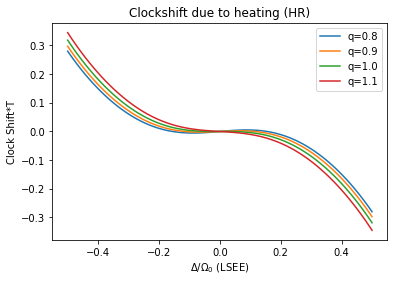

In [17]:
psi0 = psi(0.0, 1.0)
Omega01 = 1.0
t1 = 3.0*np.pi/(2.0*Omega01)
T = 20.0/Omega01
t2 = np.pi/(2.0*Omega01)
tol = 1.0e-10

pts = 101 
Deltas = np.linspace(-0.5, 0.5, pts)
clockShifts0 = np.zeros(pts,)
clockShifts1 = np.zeros(pts,)
clockShifts2 = np.zeros(pts,)
clockShifts3 = np.zeros(pts,)
for ii in range(pts):
    clockShifts0[ii] = T*HRJump2findRoot(psi0, t1, T, t2, Deltas[ii], Omega01, Omega01, 0.8*Omega01, tol)
    clockShifts1[ii] = T*HRJump2findRoot(psi0, t1, T, t2, Deltas[ii], Omega01, Omega01, 0.9*Omega01, tol)
    clockShifts2[ii] = T*HRJump2findRoot(psi0, t1, T, t2, Deltas[ii], Omega01, Omega01, 1.0*Omega01, tol)
    clockShifts3[ii] = T*HRJump2findRoot(psi0, t1, T, t2, Deltas[ii], Omega01, Omega01, 1.1*Omega01, tol)
    
plt.plot(Deltas, clockShifts0, label="q=0.8")
plt.plot(Deltas, clockShifts1, label="q=0.9")
plt.plot(Deltas, clockShifts2, label="q=1.0")
plt.plot(Deltas, clockShifts3, label="q=1.1")
plt.xlabel("$\Delta / \Omega_0$ (LSEE)")
plt.ylabel('Clock Shift*T')
plt.title("Clockshift due to heating (HR)")
plt.legend()
plt.show()

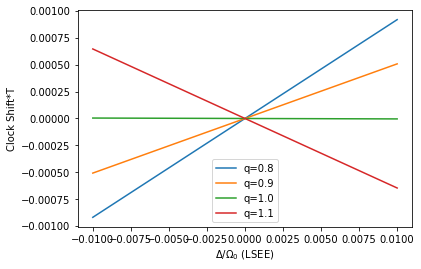

In [18]:
plt.plot(Deltas[pts//2 - 1: pts//2 + 2], clockShifts0[pts//2 - 1: pts//2 + 2], label="q=0.8")
plt.plot(Deltas[pts//2 - 1: pts//2 + 2], clockShifts1[pts//2 - 1: pts//2 + 2], label="q=0.9")
plt.plot(Deltas[pts//2 - 1: pts//2 + 2], clockShifts2[pts//2 - 1: pts//2 + 2], label="q=1.0")
plt.plot(Deltas[pts//2 - 1: pts//2 + 2], clockShifts3[pts//2 - 1: pts//2 + 2], label="q=1.1")
plt.legend()
plt.xlabel("$\Delta / \Omega_0$ (LSEE)")
plt.ylabel('Clock Shift*T')
plt.show()

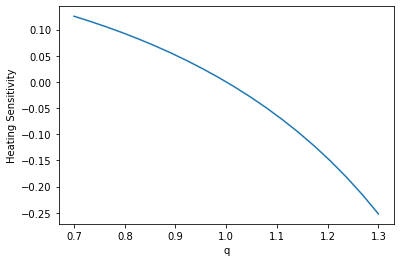

In [19]:
pts = 20
qPts = np.linspace(0.7, 1.3, pts)
heatSens = np.zeros(pts,)

for ii in range(pts):
    heatSens[ii] = HRJump2HeatingSensitivity(qPts[ii])
    
heatSens = heatSens - HRJump2HeatingSensitivity(1.0)
plt.plot(qPts, heatSens)
plt.xlabel("q")
plt.ylabel("Heating Sensitivity")
plt.show()

Now lets compare the sensitivity to heating of these three pulse sequences:

In [20]:
pts = 20
qPts = np.linspace(0.5, 1.0, pts)
heatSens0 = np.zeros(pts,)
heatSens1 = np.zeros(pts,)
heatSens2 = np.zeros(pts,)

for ii in range(pts):
    heatSens0[ii] = RamseyHeatingSensitivity(qPts[ii])
    heatSens1[ii] = HRJumpHeatingSensitivity(qPts[ii], 51)
    heatSens2[ii] = HRJump2HeatingSensitivity(qPts[ii])
    
heatSens0 = heatSens0 - RamseyHeatingSensitivity(1.0)
heatSens1 = heatSens1 - HRJumpHeatingSensitivity(1.0, 51)
heatSens2 = heatSens2 - HRJump2HeatingSensitivity(1.0)

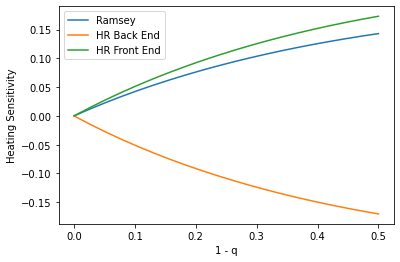

In [21]:
plt.plot(1-qPts, heatSens0, label="Ramsey")
plt.plot(1-qPts, heatSens1, label="HR Back End")
plt.plot(1-qPts, heatSens2, label="HR Front End")
plt.xlabel("1 - q")
plt.ylabel("Heating Sensitivity")
plt.legend()
plt.show()

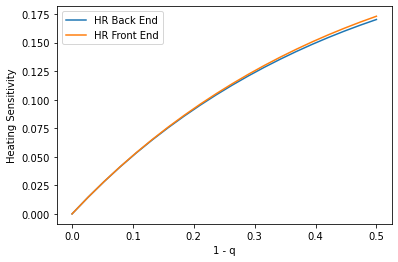

In [22]:
plt.plot(1-qPts, np.abs(heatSens1), label="HR Back End")
plt.plot(1-qPts, heatSens2, label="HR Front End")
plt.xlabel("1 - q")
plt.ylabel("Heating Sensitivity")
plt.legend()
plt.show()

Now for a Hyper-Ramsey sequence without the phase jump during the long pulse:

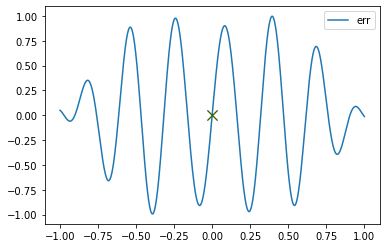

-0.00042332128311196957

In [23]:
psi0 = psi(0.0, 1.0)
q = 0.9
Delta = -0.01
Omega01 = 1.0
Omega02 = q*Omega01
t1 = np.pi/(2.0*Omega01)
T = 20.0/Omega01
t2 = 3.0*np.pi/(2.0*Omega01)
tol = 1.0e-10
CS0 = 0.0

pts = 1000
delds = np.linspace(-1.0, 1.0, pts)
errSigPts = np.zeros(pts,)
RhoeeM = np.zeros(pts,)
RhoeeP = np.zeros(pts,)
dif = np.zeros(pts,)
for ii in range(pts):
    errSigPts[ii] = HRerrSig(psi0, t1, T, t2, delds[ii], delds[ii]+Delta, Omega01, Omega02)
    RhoeeM[ii] = rhoee(hyperRamseyM(psi0, t1, T, t2, delds[ii], delds[ii]+Delta, Omega01, Omega02))
    RhoeeP[ii] = rhoee(hyperRamseyP(psi0, t1, T, t2, delds[ii], delds[ii]+Delta, Omega01, Omega02))
    dif[ii] = RhoeeP[ii] - RhoeeM[ii]
    
plt.plot(delds,errSigPts, label = "err")
#plt.plot(delds, dif, label="dif")
#plt.plot(delds,RhoeeM, label="p")
#plt.plot(delds, RhoeeP, label="m")
plt.plot([0.0], [0.0], marker="x", color="red", markersize=10)
plt.plot([HRfindRoot(psi0, t1, T, t2, Delta, Omega01, Omega02, tol, CS0)],[0.0], marker="x", color="green", markersize=10)
plt.legend()
plt.show()
HRfindRoot(psi0, t1, T, t2, Delta, Omega01, Omega02, tol, CS0)

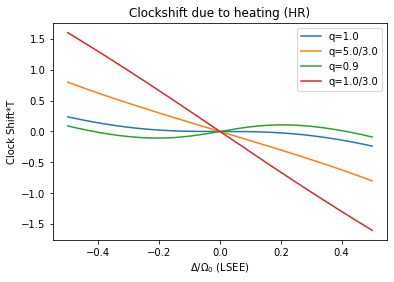

In [24]:
psi0 = psi(0.0, 1.0)
q = 0.9
Omega01 = 1.0
Omega02 = q*Omega01
t1 = np.pi/(2.0*Omega01)
T = 20.0/Omega01
t2 = 3.0*np.pi/(2.0*Omega01)
tol = 1.0e-10
CS0 = 0.0
CS1 = 0.0
CS2 = 0.0
CS3 = 0.0

pts = 101 
Deltas = np.linspace(0.0, 0.5, pts)
clockShifts0 = np.zeros(pts,)
clockShifts1 = np.zeros(pts,)
clockShifts2 = np.zeros(pts,)
clockShifts3 = np.zeros(pts,)
for ii in range(pts):
    clockShifts0[ii] = T*HRfindRoot(psi0, t1, T, t2, Deltas[ii], Omega01, Omega01, tol, CS0)
    CS0 = clockShifts0[ii]/T
    #print(CS0)
    clockShifts1[ii] = T*HRfindRoot(psi0, t1, T, t2, Deltas[ii], Omega01, 5.0/3.0*Omega01, tol, CS1)
    CS1 = clockShifts1[ii]/T
    clockShifts2[ii] = T*HRfindRoot(psi0, t1, T, t2, Deltas[ii], Omega01, 0.9*Omega01, tol, CS2)
    CS2 = clockShifts2[ii]/T
    clockShifts3[ii] = T*HRfindRoot(psi0, t1, T, t2, Deltas[ii], Omega01, 1.0/3.0*Omega01, tol, CS3)
    CS3 = clockShifts3[ii]/T
    
    
DeltaPts = np.concatenate((np.flip(-Deltas),Deltas))
cs0 = np.concatenate((np.flip(-clockShifts0), clockShifts0))
cs1 = np.concatenate((np.flip(-clockShifts1), clockShifts1))
cs2 = np.concatenate((np.flip(-clockShifts2), clockShifts2))
cs3 = np.concatenate((np.flip(-clockShifts3), clockShifts3))
    
plt.plot(DeltaPts, cs0, label="q=1.0")
plt.plot(DeltaPts, cs1, label="q=5.0/3.0")
plt.plot(DeltaPts, cs2, label="q=0.9")
plt.plot(DeltaPts, cs3, label="q=1.0/3.0")
plt.xlabel("$\Delta / \Omega_0$ (LSEE)")
plt.ylabel('Clock Shift*T')
plt.title("Clockshift due to heating (HR)")
plt.legend()
plt.show()

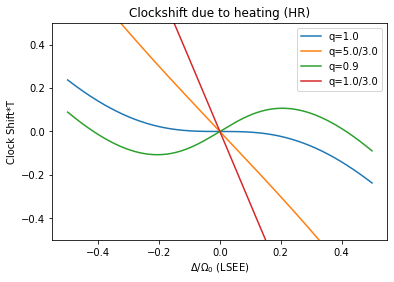

In [25]:
plt.plot(DeltaPts, cs0, label="q=1.0")
plt.plot(DeltaPts, cs1, label="q=5.0/3.0")
plt.plot(DeltaPts, cs2, label="q=0.9")
plt.plot(DeltaPts, cs3, label="q=1.0/3.0")
plt.xlabel("$\Delta / \Omega_0$ (LSEE)")
plt.ylabel('Clock Shift*T')
plt.title("Clockshift due to heating (HR)")
plt.ylim([-0.5, 0.5])
plt.legend()
plt.show()

Here I plot the "heating sensitivity" against the area of the second pulse in a Ramsey style sequence. As a reminder "heating sensitivity" is actually the sensitivty of the clock shift to the light shift estimate error for a given "heating" or pulse area asymetry. 

In [26]:
pts = 5001
qPts = np.linspace(0.01, 18.0/3.0, pts)
heatSens = np.zeros(pts,)

for ii in range(pts):
    #print(qPts[ii])
    heatSens[ii] = HRHeatingSensitivity(qPts[ii])
    
heatSens = heatSens - HRHeatingSensitivity(1.0)

not valid interval
not valid interval
not valid interval
not valid interval
not valid interval


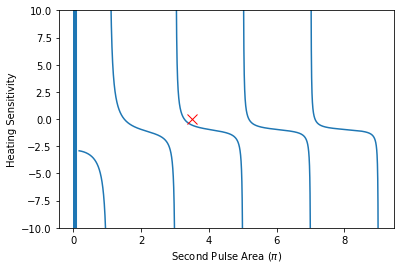

In [27]:
pts = 5001
qPts = np.linspace(0.01, 18.0/3.0, pts)
plt.plot(qPts*(3.0/2.0), heatSens)
plt.plot([3.5], [0.0], marker="x", color="red", markersize=10)
plt.xlabel("Second Pulse Area $(\pi)$")
plt.ylabel("Heating Sensitivity")
#plt.xlim([1,3])
plt.ylim([-10, 10])
plt.show()

In [28]:
pts = 1001
qPts = np.linspace(0.00001, 0.1, pts)
heatSens1 = np.zeros(pts,)

for ii in range(pts):
    #print(qPts[ii])
    heatSens1[ii] = HRHeatingSensitivity(qPts[ii])
    
heatSens1 = heatSens1 - HRHeatingSensitivity(1.0)

not valid interval


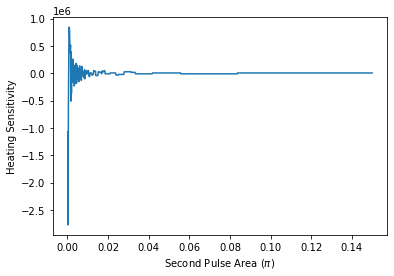

In [29]:
plt.plot(qPts*(3.0/2.0), heatSens1)
plt.xlabel("Second Pulse Area $(\pi)$")
plt.ylabel("Heating Sensitivity")
#plt.ylim([-10, 10])
plt.show()

In [30]:
pts = 1001
qPts = np.linspace(1.0, 5.0/3.0, pts)
heatSens2 = np.zeros(pts,)

for ii in range(pts):
    #print(qPts[ii])
    heatSens2[ii] = HRHeatingSensitivity(qPts[ii])
    
heatSens2 = heatSens2 - HRHeatingSensitivity(1.0)

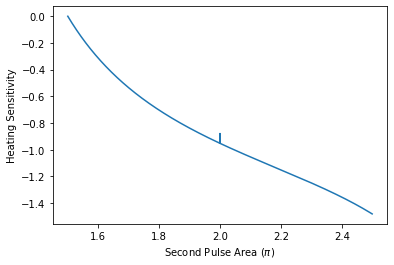

In [31]:
plt.plot(qPts*(3.0/2.0), heatSens2)
plt.xlabel("Second Pulse Area $(\pi)$")
plt.ylabel("Heating Sensitivity")
#plt.ylim([-10, 10])
plt.show()

In [32]:
pts = 1001
qPts = np.linspace(4.0/3.0-0.01, 4.0/3.0+0.01, pts)
heatSens3 = np.zeros(pts,)

for ii in range(pts):
    #print(qPts[ii])
    heatSens3[ii] = HRHeatingSensitivity(qPts[ii])
    
heatSens3 = heatSens3 - HRHeatingSensitivity(1.0)

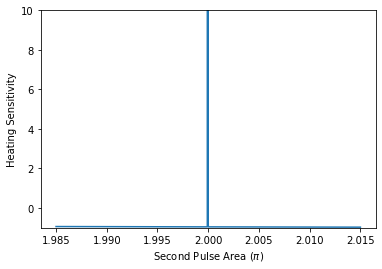

In [33]:
pts = 1001
qPts = np.linspace(4.0/3.0-0.01, 4.0/3.0+0.01, pts)
plt.plot(qPts*(3.0/2.0), heatSens3)
plt.xlabel("Second Pulse Area $(\pi)$")
plt.ylabel("Heating Sensitivity")
plt.ylim([-1, 10])
plt.show()

What I want is a plot of Heating Sensitivity functions for each relevant ideal pulse area, $3\pi/2, 5\pi/2$, etc vs q.